In [ ]:
import keras
from matplotlib import pyplot
%matplotlib inline
from tensorflow.keras.models import Sequential
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Conv1D, MaxPooling1D, AveragePooling1D, UpSampling1D
from keras.utils import np_utils
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_curve
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.metrics import roc_curve, auc
import os, math
from sklearn.metrics import confusion_matrix, matthews_corrcoef, classification_report, roc_auc_score, accuracy_score
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.utils import class_weight
import tensorflow
from numpy.random import seed
tensorflow.random.set_seed(2)

import os
import random
import numpy as np
import tensorflow as tf
from keras.regularizers import l2,l1
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
def set_rd_seed():
    # Seed value (can actually be different for each attribution step)
    seed_value= 0

    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    os.environ['PYTHONHASHSEED']=str(seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    random.seed(seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    np.random.seed(seed_value)

    # 4. Set `tensorflow` pseudo-random generator at a fixed value
    tf.random.set_seed(2)

In [ ]:
def labelToOneHot(label):# 0--> [1 0], 1 --> [0 1]
    label = label.reshape(len(label), 1)
    label = np.append(label, label, axis = 1)
    label[:,0] = label[:,0] == 0;
    return label

In [ ]:
def CAE():

    # Encoder
    input_sig = Input(shape=(300,1))
    e = Conv1D(128,12, strides=1, activation='relu', padding="same")(input_sig)
    e1 = MaxPooling1D(2)(e)
    e2 = Conv1D(64,6, strides=1, activation='relu', padding="same")(e1)
    e3 = MaxPooling1D(2)(e2)
    

    # LAY DATA O LAYER NAY DE FEED VAO 1D CNN BEN DUOI
    #flat = Flatten()(x3) 
    
    # Decoder
    d3 = UpSampling1D(2)(e3)
    d2 = Conv1D(128,6,strides=1, activation='relu', padding="same")(d3)
    d1 = UpSampling1D(2)(d2)
    decoded = Conv1D(1,12,strides=1, activation='relu', padding="same")(d1)

    autoencoder = Model(input_sig, decoded)
    autoencoder.compile(optimizer='adadelta', loss='mse')
    print("^^^^^^^^^^^^^^^^ autoencoder ^^^^^^^^^^^^^^^^ \n",autoencoder.summary())
    return autoencoder

In [ ]:
def extract_layers(main_model, starting_layer_ix, ending_layer_ix):
    # create an empty model
    new_model = Sequential()
    for ix in range(starting_layer_ix, ending_layer_ix + 1):
        curr_layer = main_model.get_layer(index=ix)
        # copy this layer over to the new model
        new_model.add(curr_layer)
    #print("^^^^^^^^^^^^^^^^ AE extracted model ^^^^^^^^^^^^^^^^ \n",new_model.summary())
    return new_model

In [ ]:
def CNN(latentFeature,CNN_dropout, CNN_re):
    # define model
    input_sig = Input(shape=(latentFeature.shape[1]*latentFeature.shape[2],1))
    x1 = Conv1D(128,48, activation='relu', padding='same')(input_sig)
    x2 = MaxPooling1D(2)(x1)
    x3 = Conv1D(64,46, activation='relu', padding='same')(x2)
    x4 = Dropout(CNN_dropout)(x3)
    x5 = MaxPooling1D(2)(x4)
    x6 = Dropout(CNN_dropout)(x5)
    flat = Flatten()(x6)
    d1 = Dense(256, activation='relu', kernel_regularizer=l2(CNN_re))(flat)
    d2 = Dense(512, activation='relu', kernel_regularizer=l2(CNN_re))(d1)
    output_layer = Dense(2, activation='softmax')(d2)

    cnn= Model(input_sig, output_layer)
    #print("^^^^^^^^^^^^^^^^ CNN ^^^^^^^^^^^^^^^^ \n",cnn.summary())
    return cnn

In [ ]:
#arc 1.3    
def CNN1(latentFeature,CNN_dropout, CNN_re):
    # define model
    input_sig = Input(shape=(latentFeature.shape[1]*latentFeature.shape[2],1))
    x1 = Conv1D(256,128, activation='relu', padding='same')(input_sig)
    x2 = MaxPooling1D(2)(x1)
    x3 = Conv1D(128,64, activation='relu', padding='same')(x2)
    x4 = Dropout(CNN_dropout)(x3)
    x5 = MaxPooling1D(2)(x4)
    x6 = Dropout(CNN_dropout)(x5)
    flat = Flatten()(x6)
    d1 = Dense(256, activation='relu', kernel_regularizer=l2(CNN_re))(flat)
    d2 = Dense(512, activation='relu', kernel_regularizer=l2(CNN_re))(d1)
    output_layer = Dense(2, activation='softmax')(d2)

    cnn= Model(input_sig, output_layer)
    #print("^^^^^^^^^^^^^^^^ CNN ^^^^^^^^^^^^^^^^ \n",cnn.summary())
    return cnn

In [ ]:
#arc 1.4    
def CNN2(latentFeature,CNN_dropout, CNN_re):
    # define model
    input_sig = Input(shape=(latentFeature.shape[1]*latentFeature.shape[2],1))
    x1 = Conv1D(256,128, activation='relu', padding='same')(input_sig)
    x2 = MaxPooling1D(2)(x1)
    x3 = Conv1D(128,64, activation='relu', padding='same')(x2)
    x4 = Dropout(CNN_dropout)(x3)
    x5 = MaxPooling1D(2)(x4)
    x6 = Conv1D(64,32, activation='relu', padding='same')(x5)
    x7 = Dropout(CNN_dropout)(x6)
    x8 = MaxPooling1D(2)(x7)
    flat = Flatten()(x8)
    d1 = Dense(256, activation='relu', kernel_regularizer=l2(CNN_re))(flat)
    d2 = Dense(512, activation='relu', kernel_regularizer=l2(CNN_re))(d1)
    output_layer = Dense(2, activation='softmax')(d2)

    cnn= Model(input_sig, output_layer)
    #print("^^^^^^^^^^^^^^^^ CNN ^^^^^^^^^^^^^^^^ \n",cnn.summary())
    return cnn

In [ ]:
#arc 1.5    
def CNN3(latentFeature,CNN_dropout, CNN_re):
    # define model
    input_sig = Input(shape=(latentFeature.shape[1]*latentFeature.shape[2],1))
    x1 = Conv1D(512,128, activation='relu', padding='same')(input_sig)
    x2 = MaxPooling1D(2)(x1)
    x3 = Conv1D(256,64, activation='relu', padding='same')(x2)
    x4 = Dropout(CNN_dropout)(x3)
    x5 = MaxPooling1D(2)(x4)
    x6 = Conv1D(128,32, activation='relu', padding='same')(x5)
    x7 = Dropout(CNN_dropout)(x6)
    x8 = MaxPooling1D(2)(x7)
    flat = Flatten()(x8)
    d1 = Dense(256, activation='relu', kernel_regularizer=l2(CNN_re))(flat)
    d2 = Dense(512, activation='relu', kernel_regularizer=l2(CNN_re))(d1)
    output_layer = Dense(2, activation='softmax')(d2)

    cnn= Model(input_sig, output_layer)
    #print("^^^^^^^^^^^^^^^^ CNN ^^^^^^^^^^^^^^^^ \n",cnn.summary())
    return cnn

In [ ]:
def trainAndPredict(arcType, pathToSaveModel, trainFile, testFile, AE_epochs, AE_batch_size, AE_lr, CNN_epochs, CNN_batch_size, CNN_lr, CNN_dropout, CNN_re, wd, fold, PRfile, fileForEpochPlotting, fileForCurvePlotting):
    
    #xu ly train input
    dataset=pd.read_csv(trainFile,header=None)
    X_train = dataset.iloc[:, 0:wd*20].values
    X_train=X_train.reshape(X_train.shape[0],wd*20,1)
    y_train = dataset.iloc[:, wd*20].values
    y_train = labelToOneHot(y_train)
    #print("X_train shape ",X_train.shape)
    #print("y_train shape = ",y_train.shape)
    
    #lay train input tren neg only
    X_train_neg=dataset[dataset[dataset.shape[1]-1]==0]
    X_train_neg = X_train_neg.iloc[:, 0:wd*20].values
    X_train_neg=X_train_neg.reshape(X_train_neg.shape[0],wd*20,1)
    #print("X_train_neg shape ",X_train_neg.shape)
    
    #xu ly test input
    dataset=pd.read_csv(testFile,header=None)
    X_test = dataset.iloc[:, 0:wd*20].values
    X_test=X_test.reshape(X_test.shape[0],wd*20,1)
    y_test = dataset.iloc[:, wd*20].values
    y_test = labelToOneHot(y_test)
    #print("X_test shape ",X_test.shape)
    #print("y_test shape = ",y_test.shape)
    
    if not(os.path.exists(pathToSaveModel+"/bothLabel.fold"+str(fold)+"_epoch"+str(AE_epochs)+".batch_size"+str(AE_batch_size)+".lr"+str(AE_lr)+".AE.h5")):
        #train AE
        autoencoder=CAE()
        adam = Adam(lr=AE_lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        autoencoder.compile(metrics=['mse', "accuracy"],loss='mean_squared_error', optimizer=adam)
        # sc=tf.keras.callbacks.LearningRateScheduler(scheduler)
        es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=30)
        cp = ModelCheckpoint(pathToSaveModel+"/bothLabel.fold"+str(fold)+"_epoch"+str(AE_epochs)+".batch_size"+str(AE_batch_size)+".lr"+str(AE_lr)+".AE.h5", monitor='loss', mode='min', verbose=1, save_best_only=True)
        AE_history = autoencoder.fit(X_train, X_train, batch_size=AE_batch_size, epochs=AE_epochs, verbose=1, callbacks=[cp, es])
        # #lay history de ve
        with open(fileForEpochPlotting[:-4]+"AE.csv", mode='w') as f:
            f.write("epoch,accuracy,loss\n")
            epoch=0
            for i,j in zip(AE_history.history['accuracy'],AE_history.history['loss']):
                f.write(str(epoch)+","+str(i)+","+str(j)+"\n")
                epoch+=1
    
    AE_saved_model = load_model(pathToSaveModel+"/bothLabel.fold"+str(fold)+"_epoch"+str(AE_epochs)+".batch_size"+str(AE_batch_size)+".lr"+str(AE_lr)+".AE.h5")
    starting_layer_ix=0
    ending_layer_ix=4 # bottle neck can lay
    #lay ve best half AE
    half_CAE = extract_layers(AE_saved_model, starting_layer_ix, ending_layer_ix)
    
    
    #train CNN tren train data
    train_latentFeature=half_CAE.predict(X_train)
    #print("train_latentFeature shape ",train_latentFeature.shape)
    train_latentFeature=train_latentFeature.reshape(train_latentFeature.shape[0],train_latentFeature.shape[1]*train_latentFeature.shape[2],1)
    #print("train_latentFeature reshape ",train_latentFeature.shape)
    test_latentFeature=half_CAE.predict(X_test)
    #print("test_latentFeature shape ",test_latentFeature.shape)
    test_latentFeature=test_latentFeature.reshape(test_latentFeature.shape[0],test_latentFeature.shape[1]*test_latentFeature.shape[2],1)
    #print("test_latentFeature reshape ",test_latentFeature.shape)
    if arcType==0:
        cnnModel = CNN(train_latentFeature,CNN_dropout,CNN_re)
    if arcType==1:
        cnnModel = CNN1(train_latentFeature,CNN_dropout,CNN_re)
    if arcType==2:
        cnnModel = CNN2(train_latentFeature,CNN_dropout,CNN_re)
    if arcType==3:
        cnnModel = CNN3(train_latentFeature,CNN_dropout,CNN_re)
    adam = Adam(lr=CNN_lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    cnnModel.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    # sc=tf.keras.callbacks.LearningRateScheduler(scheduler)
    es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=30)
    cp = ModelCheckpoint(pathToSaveModel+"/runAgain.fold"+str(fold)+"_epoch"+str(CNN_epochs)+".batch_size"+str(CNN_batch_size)+".lr"+str(CNN_lr)+".CNN_dropout"+str(CNN_dropout)+"CNN_re"+str(CNN_re)+".CNN.h5", monitor='loss', mode='min', verbose=2, save_best_only=True)
    # cw = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train) 
    CNN_history = cnnModel.fit(train_latentFeature, y_train, batch_size=CNN_batch_size, epochs=CNN_epochs, verbose=1, callbacks=[cp, es])
    
    
    with open(fileForEpochPlotting, mode='w') as f:
        f.write("epoch,accuracy,loss\n")
        epoch=0
        for i,j in zip(CNN_history.history['accuracy'],CNN_history.history['loss']):
            f.write(str(epoch)+","+str(i)+","+str(j)+"\n")
            epoch+=1
    CNN_saved_model = load_model(pathToSaveModel+"/runAgain.fold"+str(fold)+"_epoch"+str(CNN_epochs)+".batch_size"+str(CNN_batch_size)+".lr"+str(CNN_lr)+".CNN_dropout"+str(CNN_dropout)+"CNN_re"+str(CNN_re)+".CNN.h5")
    y_pred=CNN_saved_model.predict(test_latentFeature)
    # calculate roc curves
    #fpr, tpr, _ = roc_curve(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    fpr, tpr, _ = roc_curve(y_test[:,1], y_pred[:,1])
    # plot the roc curve for the model
    roc_auc = roc_auc_score(y_test, y_pred)
    pyplot.plot(fpr, tpr, marker='.', label="CNN-AU ROC is {0:.3f}%".format(roc_auc) )
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    pyplot.title(str(fold)+"_epoch"+str(CNN_epochs)+".batch_size"+str(CNN_batch_size)+".lr"+str(CNN_lr)+".CNN_dropout"+str(CNN_dropout)+"CNN_re"+str(CNN_re))
    #save the plot
    folderForImage="drive/MyDrive/Electron transport - AutoEncoder/FAD/pssm features wd 15"
    pyplot.savefig(folderForImage+"/"+str(fold)+"_epoch"+str(CNN_epochs)+".batch_size"+str(CNN_batch_size)+".lr"+str(CNN_lr)+".CNN_dropout"+str(CNN_dropout)+"CNN_re"+str(CNN_re)+".AUROC.png")
    # show the plot
    pyplot.show()


    # convert the prediction to a pandas DataFrame:     
    ypred_df = pd.DataFrame(y_pred)
    #save to csv: 
    with open(fileForCurvePlotting, mode='w') as f:
        ypred_df.to_csv(f)
    
    
    CNN_saved_model = load_model(pathToSaveModel+"/runAgain.fold"+str(fold)+"_epoch"+str(CNN_epochs)+".batch_size"+str(CNN_batch_size)+".lr"+str(CNN_lr)+".CNN_dropout"+str(CNN_dropout)+"CNN_re"+str(CNN_re)+".CNN.h5")
    y_pred=CNN_saved_model.predict(test_latentFeature)
    pos_probs = y_pred[:, 1]
    # calculate PR roc curve for model
    # precisions, recalls, thresholds  = precision_recall_curve(y_test, pos_probs)
    #precisions, recalls, thresholds  = precision_recall_curve(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    precisions, recalls, thresholds  = precision_recall_curve(y_test[:,1], y_pred[:,1])
    # calculate the precision-recall auc
    auc_score = auc(recalls, precisions)
    #plot
    pyplot.plot(recalls, precisions, marker='.', label="CNN-AUPR curve is {0:.3f}%".format(auc_score))
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    pyplot.title(str(fold)+"_epoch"+str(CNN_epochs)+".batch_size"+str(CNN_batch_size)+".lr"+str(CNN_lr)+".CNN_dropout"+str(CNN_dropout)+"CNN_re"+str(CNN_re))
    #save to image
    pyplot.savefig(folderForImage+"/"+str(fold)+"_epoch"+str(CNN_epochs)+".batch_size"+str(CNN_batch_size)+".lr"+str(CNN_lr)+".CNN_dropout"+str(CNN_dropout)+"CNN_re"+str(CNN_re)+".AUPR.png")
    # show the plot
    pyplot.show()

    f=open(PRfile, "w")
    f.write("threshold,recall,precision,PRauc_score,roc_auc\n")
    #print("type(y_test) ",type(y_test), " ",y_test.shape," y_test.argmax(axis=1) ",y_test.argmax(axis=1).shape)
    #print("type(y_pred) ",type(y_pred), " ",y_pred.shape)
    #print("type(thresholds) ",type(thresholds), " ",thresholds.shape)
    #print("type(precisions) ",type(precisions), " ",precisions.shape)
    #print("type(recalls) ",type(recalls), " ",recalls.shape)
    for threshold, precision, recall  in zip(thresholds, precisions[:-1], recalls[:-1]):
        f.write(str(threshold)+","+str(recall)+","+str(precision)+","+str(auc_score)+","+str(roc_auc)+"\n")
    f.close()

In [ ]:
def run(arcType,pathToSaveModel, folder, inputFileTrain, inputFileTest, AE_epochs, AE_batch_size, AE_lr, CNN_epochs, CNN_batch_size, CNN_lr, CNN_dropout, CNN_re, wd, fold, PRfile, fileForEpochPlotting, fileForCurvePlotting):
  trainFile=inputFileTrain
  testFile=inputFileTest    
  trainAndPredict(arcType,pathToSaveModel, trainFile, testFile, AE_epochs, AE_batch_size, AE_lr, CNN_epochs, CNN_batch_size, CNN_lr, CNN_dropout, CNN_re, wd, fold, PRfile, fileForEpochPlotting, fileForCurvePlotting)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "drive/MyDrive/Electron transport - AutoEncoder/FAD/pssm features wd 15"


 0_epoch1.batch_size64.lr1e-05.CNN_dropout0.5CNN_re0.0001.AUPR.png
 0_epoch1.batch_size64.lr1e-05.CNN_dropout0.5CNN_re0.0001.AUROC.png
 0_epoch1.batch_size64.lr1e-05.CNN_dropout0.5CNN_re0.001.AUPR.png
 0_epoch1.batch_size64.lr1e-05.CNN_dropout0.5CNN_re0.001.AUROC.png
 0_es1000.maxft100.AUPR.png
 0_es1000.maxft100.AUROC.png
 0_es1000.maxft20.AUPR.png
 0_es1000.maxft20.AUROC.png
 0_es1000.maxft50.AUPR.png
 0_es1000.maxft50.AUROC.png
 0_es300.maxft100.AUPR.png
 0_es300.maxft100.AUROC.png
 0_es300.maxft20.AUPR.png
 0_es300.maxft20.AUROC.png
 0_es300.maxft50.AUPR.png
 0_es300.maxft50.AUROC.png
 0_es500.maxft100.AUPR.png
 0_es500.maxft100.AUROC.png
 0_es500.maxft20.AUPR.png
 0_es500.maxft20.AUROC.png
 0_es500.maxft50.AUPR.png
 0_es500.maxft50.AUROC.png
 0_g0.001.c0.001.AUPR.png
 0_g0.001.c0.001.AUROC.png
 0_g0.001.c0.01.AUPR.png
 0_g0.001.c0.01.AUROC.png
 0_g0.001.c0.1.AUPR.png
 0_g0.001.c0.1.AUROC.png
 0_g0.01.c0.001.AUPR.png
 0_g0.01.c0.001.AUROC.png
 0_g0.01.c0.01.AUPR.png
 0_g0.01.c0.01.

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 300, 1)]          0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 300, 128)          1664      
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 150, 128)          0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 150, 64)           49216     
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 75, 64)            0         
_________________________________________________________________
up_sampling1d_12 (UpSampling (None, 150, 64)           0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 150, 128)          492

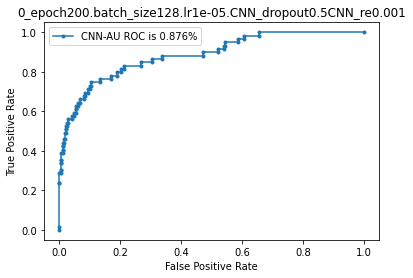

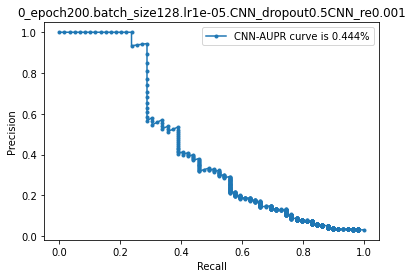

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 300, 1)]          0         
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 300, 128)          1664      
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 150, 128)          0         
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 150, 64)           49216     
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 75, 64)            0         
_________________________________________________________________
up_sampling1d_14 (UpSampling (None, 150, 64)           0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 150, 128)          492

In [ ]:
bindingTypes=["FAD"]
wd=15
for bdType in bindingTypes:
  folder="drive/MyDrive/Electron transport - AutoEncoder/FAD/pssm features wd 15"
  
  for AE_epoch in [200]:
    for AE_batch_size in [64]:
        for AE_lr in [0.00001]:
          for CNN_dropout in [0.5,0.6]:
                for CNN_epoch in [200]:
                    for CNN_batch_size in [128]:
                        for CNN_re in [1e-3,1e-4]:
                            for CNN_lr in [0.00001]:
                                  pathToSaveModel="drive/MyDrive/Electron transport - AutoEncoder/FAD/pssm features wd 15/Saved models"                           
                                                                   
                                  set_rd_seed()
                                  inputFileTrain=folder+"/input.train.csv"
                                  inputFileTest=folder+"/ind.test.csv" 
                                  rsFile=folder+"/CAE_CNN results/architecture 1/bothLabel.ex.runAgain.epoch"+str(CNN_epoch)+"_batchsize"+str(CNN_batch_size)+"_lr"+str(CNN_lr)+".CNN_dropout"+str(CNN_dropout)+"CNN_re"+str(CNN_re)+"_ind.result.csv"
                                  run(0,pathToSaveModel, folder, inputFileTrain, inputFileTest,  AE_epoch, AE_batch_size, AE_lr, CNN_epoch, CNN_batch_size, CNN_lr, CNN_dropout, CNN_re, wd, 0,rsFile[:-4]+".PR.csv",rsFile[:-4]+".epochPlot.csv",rsFile[:-4]+"yPred.csv")
                                  
                                  for fold in [1,2,3,4,5]:
                                    set_rd_seed()
                                    inputFileTrain=folder+"/input.fold.train"+str(fold)+".csv"
                                    inputFileTest=folder+"/input.fold.test"+str(fold)+".csv" 
                                    rsFile=folder+"/CAE_CNN results/architecture 1/bothLabel.ex.runAgain.epoch"+str(CNN_epoch)+"_batchsize"+str(CNN_batch_size)+"_lr"+str(CNN_lr)+".CNN_dropout"+str(CNN_dropout)+"CNN_re"+str(CNN_re)+"_fold.result"+str(fold)+".csv"
                                    run(0,pathToSaveModel, folder, inputFileTrain, inputFileTest,  AE_epoch, AE_batch_size, AE_lr, CNN_epoch, CNN_batch_size, CNN_lr, CNN_dropout, CNN_re, wd, fold,rsFile[:-4]+".PR.csv",rsFile[:-4]+".epochPlot.csv",rsFile[:-4]+"yPred.csv")
                                  
  
  
  